In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
beds_df = pd.read_csv("../Resources/Clean Data/combined_beds_df.csv")

homeless_df = pd.read_csv("../Resources/Clean Data/combined_OvHo_df.csv")

In [3]:
beds_df.head()

,"Total Beds ES, TH, PSH",State,Year
0,4490,AL,2023
1,3036,AR,2023
2,17292,AZ,2023
3,145566,CA,2023
4,15755,CO,2023


In [4]:
homeless_df.head()

,State,Overall Homeless,Year
0,AL,3304,2023
1,AR,2609,2023
2,AZ,14237,2023
3,CA,181399,2023
4,CO,14439,2023


In [5]:
combined_df = pd.merge(homeless_df, beds_df, on=['State', 'Year'], how='inner')
combined_df.head()

,State,Overall Homeless,Year,"Total Beds ES, TH, PSH"
0,AL,3304,2023,4490
1,AR,2609,2023,3036
2,AZ,14237,2023,17292
3,CA,181399,2023,145566
4,CO,14439,2023,15755


In [6]:
combined_df.isna().sum()

State                     0
Overall Homeless          0
Year                      0
Total Beds ES, TH, PSH    0
dtype: int64

In [7]:
yearly_sum_df = combined_df.groupby('Year').sum().reset_index()

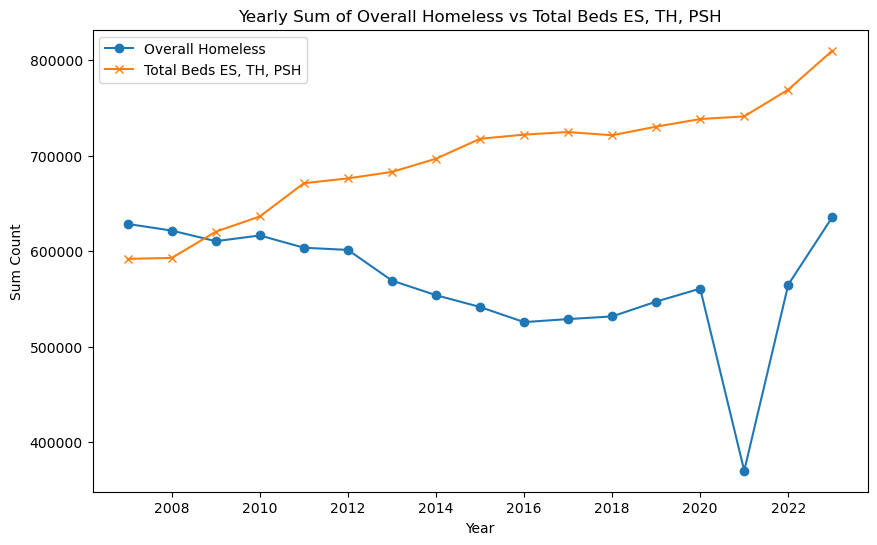

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(yearly_sum_df['Year'], yearly_sum_df['Overall Homeless'], label='Overall Homeless', marker='o')

plt.plot(yearly_sum_df['Year'], yearly_sum_df['Total Beds ES, TH, PSH'], label='Total Beds ES, TH, PSH', marker='x')

plt.xlabel('Year')
plt.ylabel('Sum Count')
plt.title('Yearly Sum of Overall Homeless vs Total Beds ES, TH, PSH')
plt.legend()
plt.show()